In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
STEP = .01

In [3]:
a1, a2 = symbols('a1,a2')

In [4]:
mse = 1 / 4 * ((4.1 * a1 + 3.9 * a2 - 4.0)**2 + \
               (4.7 * a1 + 4.2 * a2 - 4.3)**2 + \
               (3.1 * a1 + 2.9 * a2 - 3.0)**2 + \
               (4.9 * a1 + 5.0 * a2 - 4.9)**2)
simplify(mse)

18.13*a1**2 + 34.61*a1*a2 - 34.96*a1 + 16.565*a2**2 - 33.43*a2 + 16.875

In [5]:
grad = np.array([diff(mse, a1), diff(mse, a2)])
grad

array([36.26*a1 + 34.61*a2 - 34.96, 34.61*a1 + 33.13*a2 - 33.43],
      dtype=object)

In [6]:
scatter = [np.array([0, 0])]
[print(f"Точка = {scatter[-1]}") or
 print(f"MSE = {mse.subs({a1:scatter[-1][0], a2:scatter[-1][1]})}") or
 scatter.append(scatter[-1] - STEP * np.array([grad[i].subs({a1:scatter[-1][0], a2:scatter[-1][1]}) for i in range(2)])) for iteration in range(10)];

Точка = [0 0]
MSE = 16.8750000000000
Точка = [0.349600000000000 0.334300000000000]
MSE = 1.58934775845000
Точка = [0.456733810000000 0.436849850000000]
MSE = 0.152475176254023
Точка = [0.489528397409000 0.468345923054000]
MSE = 0.0174061778356472
Точка = [0.499530876539507 0.478057140402955]
MSE = 0.00470843709035235
Точка = [0.502545404412819 0.481089173417132]
MSE = 0.00351375729142456
Точка = [0.503417477853061 0.482073365796760]
MSE = 0.00340038148468236
Точка = [0.503632708481283 0.482429670623349]
MSE = 0.00338865074786379
Точка = [0.503646579383229 0.482593440340461]
MSE = 0.00338647584705397
Точка = [0.503598739997036 0.482698152431131]
MSE = 0.00338520027155468


In [7]:
def plot_mse(scatter:list, mse) -> None:
    mse_scatter = [mse.subs({a1:scatter[i][0], a2:scatter[i][1]}) for i in range(len(scatter)-1)]
    plt.scatter([x + 1 for x in range(len(mse_scatter))], [y for y in mse_scatter], c = 'red')
    plt.xlim(2.5, len(mse_scatter))
    plt.ylim(0, 0.25)
    plt.axhline(0)
    plt.axvline(0)
    plt.xlabel('Итерация')
    plt.ylabel('MSE')
    plt.title('Зависимость MSE от итерации градиентного спуска')
    plt.plot([i + 1  for i in range(len(mse_scatter))], mse_scatter);

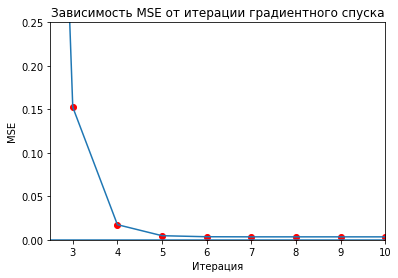

In [8]:
plot_mse(scatter, mse)